<a href="https://colab.research.google.com/github/Atchayapriya24/timeseriesproject/blob/main/127177035.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**weekly electricity consumption data **(finding trend and seasonality component for  data)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def moving_average_odd(data, q):

    n = len(data)
    m_t = np.zeros(n)

    for t in range(q, n - q):
        m_t[t] = np.mean(data[t-q:t+q+1])

    return m_t

def moving_average_even(data, q):

    n = len(data)
    m_t = np.zeros(n)
    d = 2*q

    for t in range(q, n - q):
        m_t[t] = (0.5 * data[t-q]['consumption'] + np.sum([item['consumption']for item in data[t-q+1:t+q]]) + 0.5 * data[t+q]['consumption']) / d

    return m_t

def calculate_w_k(data, trend, d):

    n = len(data)
    w_k = np.zeros(n)

    for k in range(n):
        summation = 0
        count = 0
        for j in range(-(n // d), n // d):
            if 0 <= k + j*d < n:
                summation += data[k + j*d]['consumption'] - trend[k + j*d]
                count += 1
        if count > 0:
            w_k[k] = summation / count

    return w_k

def calculate_g_k(w_k, d): #seasonality

    n = len(w_k)
    avg_w = np.mean(w_k)
    g_k = np.zeros(n)

    for k in range(n):
        g_k[k] = w_k[k] - avg_w

    return g_k

data = np.array([
  {"week": "2023-01-01", "consumption": 300},
  {"week": "2023-01-08", "consumption": 320},
  {"week": "2023-01-15", "consumption": 340},
  {"week": "2023-01-22", "consumption": 350},
  {"week": "2023-01-29", "consumption": 330},
  {"week": "2023-02-05", "consumption": 310},
  {"week": "2023-02-12", "consumption": 300},
  {"week": "2023-02-19", "consumption": 290},
  {"week": "2023-02-26", "consumption": 310},
  {"week": "2023-03-05", "consumption": 360},
  {"week": "2023-03-12", "consumption": 380},
  {"week": "2023-03-19", "consumption": 400},
  {"week": "2023-03-26", "consumption": 390},
  {"week": "2023-04-02", "consumption": 420},
  {"week": "2023-04-09", "consumption": 450},
  {"week": "2023-04-16", "consumption": 460},
  {"week": "2023-04-23", "consumption": 440},
  {"week": "2023-04-30", "consumption": 430},
  {"week": "2023-05-07", "consumption": 410},
  {"week": "2023-05-14", "consumption": 480},
  {"week": "2023-05-21", "consumption": 500},
  {"week": "2023-05-28", "consumption": 520},
  {"week": "2023-06-04", "consumption": 540},
  {"week": "2023-06-11", "consumption": 550},
  {"week": "2023-06-18", "consumption": 530},
  {"week": "2023-06-25", "consumption": 520},
  {"week": "2023-07-02", "consumption": 500},
  {"week": "2023-07-09", "consumption": 520},
  {"week": "2023-07-16", "consumption": 530},
  {"week": "2023-07-23", "consumption": 540},
  {"week": "2023-07-30", "consumption": 550},
  {"week": "2023-08-06", "consumption": 580},
  {"week": "2023-08-13", "consumption": 600},
  {"week": "2023-08-20", "consumption": 620},
  {"week": "2023-08-27", "consumption": 610},
  {"week": "2023-09-03", "consumption": 590},
  {"week": "2023-09-10", "consumption": 570},
  {"week": "2023-09-17", "consumption": 550},
  {"week": "2023-09-24", "consumption": 540},
  {"week": "2023-10-01", "consumption": 600}
])
q = 2

if len(data) % 2 == 1:
    trend = moving_average_odd(data, q)
else:
    trend = moving_average_even(data, q)

w_k = calculate_w_k(data, trend, q)
g_k = calculate_g_k(w_k, q)

print("Trend:", trend)
print("Seasonality:", g_k)




Trend: [  0.     0.   331.25 333.75 327.5  315.   305.   308.75 325.   348.75
 372.5  390.   406.25 422.5  436.25 443.75 440.   437.5  447.5  466.25
 493.75 518.75 531.25 535.   530.   521.25 517.5  520.   528.75 542.5
 558.75 577.5  595.   603.75 601.25 588.75 571.25 563.75   0.     0.  ]
Seasonality: [-4.28125  4.28125 -4.28125  4.28125 -4.28125  4.28125 -4.28125  4.28125
 -4.28125  4.28125 -4.28125  4.28125 -4.28125  4.28125 -4.28125  4.28125
 -4.28125  4.28125 -4.28125  4.28125 -4.28125  4.28125 -4.28125  4.28125
 -4.28125  4.28125 -4.28125  4.28125 -4.28125  4.28125 -4.28125  4.28125
 -4.28125  4.28125 -4.28125  4.28125 -4.28125  4.28125 -4.28125  4.28125]


**code for plotting**

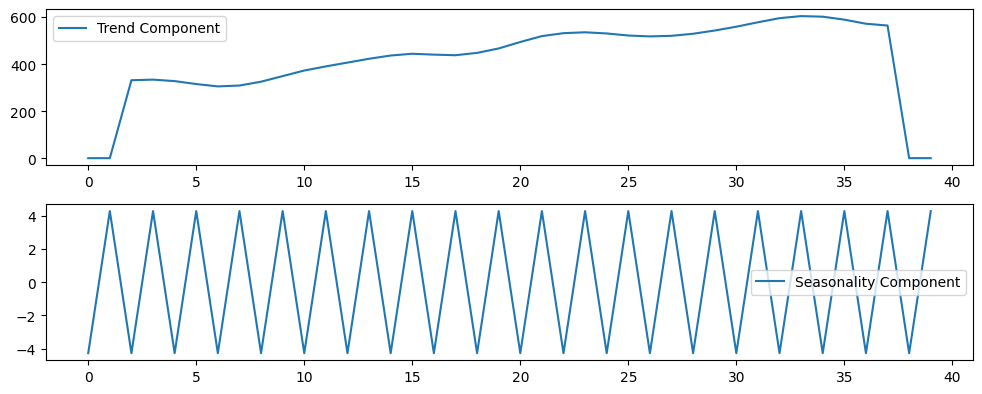

In [ ]:
plt.figure(figsize=(10, 6))


plt.subplot(3, 1, 2)
plt.plot(trend, label='Trend Component')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(g_k, label='Seasonality Component')
plt.legend()

plt.tight_layout()
plt.show()
